In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

data = pd.read_csv(r'./infomodelo.csv')
data

,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,price,price_category,is_convertible,is_rear,fueltype_gas,aspiration_turbo
0,2548,4,130,3.47,111,21,13495.0,1,True,False,True,False
1,2548,4,130,3.47,111,21,16500.0,1,True,False,True,False
2,2823,6,152,2.68,154,19,16500.0,1,False,False,True,False
3,2337,4,109,3.19,102,24,13950.0,1,False,False,True,False
4,2824,5,136,3.19,115,18,17450.0,1,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
200,2952,4,141,3.78,114,23,16845.0,1,False,False,True,False
201,3049,4,141,3.78,160,19,19045.0,1,False,False,True,True
202,3012,6,173,3.58,134,18,21485.0,1,False,False,True,False
203,3217,6,145,3.01,106,26,22470.0,1,False,False,False,True


In [122]:
# Separamos los df para el modelo
X = data.drop(['price_category','price'],axis=1)
y = data['price_category']

In [123]:
from sklearn.model_selection import train_test_split

# Dividimos en sectores de entrenamiento y prueba
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [124]:
from sklearn.preprocessing import StandardScaler

# Escalamos los valores del set de train y los de test 
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [125]:
from sklearn.svm import SVC

classifier = SVC(kernel='rbf', random_state=15)
classifier.fit(X_Train, Y_Train)

SVC(random_state=15)

In [126]:
Y_Pred = classifier.predict(X_Test)

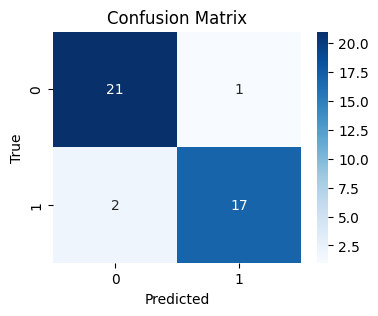

In [127]:
# Matriz de confusión 

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_Test, Y_Pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [128]:
print(classification_report(Y_Test, Y_Pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        22
           1       0.94      0.89      0.92        19

    accuracy                           0.93        41
   macro avg       0.93      0.92      0.93        41
weighted avg       0.93      0.93      0.93        41



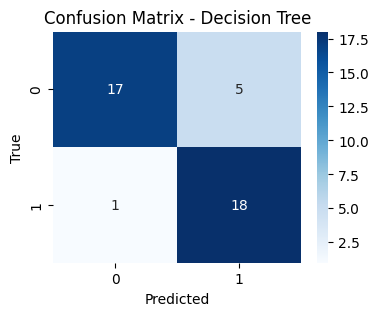

              precision    recall  f1-score   support

           0       0.94      0.77      0.85        22
           1       0.78      0.95      0.86        19

    accuracy                           0.85        41
   macro avg       0.86      0.86      0.85        41
weighted avg       0.87      0.85      0.85        41



In [130]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=35,random_state=42)
model.fit(X_Train, Y_Train)

# Predict using the trained model
y_pred_tree = model.predict(X_Test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_Test, y_pred)

# Create a heatmap of the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

print(classification_report(Y_Test, y_pred_tree))